# UIUC

## Setup

### Import standard python libraries

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
sns.set_style("ticks")
import matplotlib.pyplot as plt

### Import project modules

In [2]:
from graph.utils import *
from graph.network import *
from graph.temporal import *

<Figure size 432x288 with 0 Axes>

### Reload modules

1) Manual method

In [3]:
# import importlib

# importlib.reload(graph.utils)
# importlib.reload(graph.network)

2) Automatic method

In [4]:
%load_ext autoreload

# Auto-reload all modules
%autoreload 2

# Disable auto-reloading
# %autoreload 0

# Only reload imported modules with aimport
# %autoreload 1
# %aimport graph.utils
# %aimport graph.network

## Data

In [5]:
# TODO

## Temporal network

In [6]:
# Create
# G = temporal_bt()

# Read
# G = temporal_bt_read(output=True)

## Static network

In [7]:
# Create
# S = static_bt()

# Read
# S = static_bt_read(output=True, stat=True)

## Time-Ordered network

In [8]:
# Create
# T = ton_bt()

# Create full version
# T = ton_bt_full()

# Read
# T = ton_bt_read(output=True)

# Analize
# ton_bt_analyze()

# G_new = ton_bt_to_temporal(save_times=False, save_nodes=False, save_network_file=False)

## Edge weight

In [59]:
# Fixed panalize 0.5
# ew = edge_weight(
#     version=0,
#     omega=0.5,
#     epsilon=1,
#     gamma=0.0001,
#     distance=1,
#     alpha=0.5,
#     save_weights=False,
#     output_weights=False,
#     plot_weights=False
# )

# Dynamic panalize - current config
# ew = edge_weight(
#     version=3,
#     omega=1,
#     epsilon=1,
#     gamma=0.0001,
#     distance=0.1,
#     alpha=0.5,
#     save_weights=True,
#     output_weights=False,
#     plot_weights=False
# )

# Dynamic panalize - new config
# ew = edge_weight(
#     version=3,
#     omega=1.1,
#     epsilon=1,
#     gamma=0.0001,
#     distance=0.1,
#     alpha=0.5,
#     save_weights=False,
#     output_weights=True,
#     plot_weights=False
# )

# Read
# ew = ew_read()

## HITS

In [112]:
# HITS
# a,h = hits(
#     version=3,
#     sigma=0.85,
#     max_iter=100,
#     output=False,
#     plot=True,
#     save=True
# )

# Read
# a, h = hits_read()

# Conditional
# hits_conditional()

# Read
# hitsc = hits_conditional_read(return_all=True)

# Analize
# hits_analyze()

# Group
# hits_group()

Calculating HITS (Version 5) ...
Iteration 10 completed 0 seconds
Iteration 20 completed 1 seconds
Iteration 30 completed 0 seconds
Successful after 33 iteration


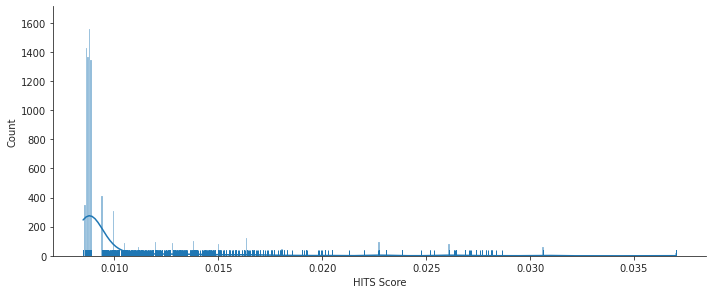

In [190]:
# HITS
a,h = hits(
    version=5,
    sigma=0.85,
    max_iter=200,
    output=True,
    plot=True,
    save=True
)

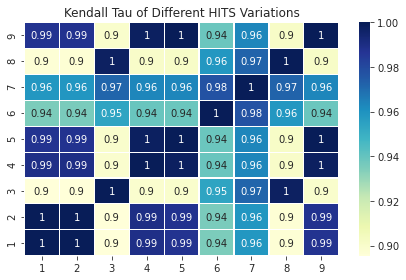

In [283]:
groups = hits_group()

In [279]:
ataus = groups[0]
htaus = groups[1]
apvals = groups[2]
hpvals = groups[3]
atau = np.eye(9)
htau = np.eye(9)
apval = np.zeros((9, 9))
hpval = np.zeros((9, 9))
for key in ataus:
    atau[key[0] - 1, key[1] - 1] = ataus[key]
    htau[key[0] - 1, key[1] - 1] = htaus[key]
    apval[key[0] - 1, key[1] - 1] = apvals[key]
    hpval[key[0] - 1, key[1] - 1] = hpvals[key]

# fig, axs = plt.subplots(2, 1)
# fig.suptitle('Kendall Tau / P-value of HITS Variations')

# axs[0].imshow(atau, cmap='hot', interpolation='nearest')
# axs[1].imshow(htau, cmap='hot', interpolation='nearest')

# axs[0, 0].imshow(atau, cmap='hot', interpolation='nearest')
# axs[0, 1].imshow(apval, cmap='hot', interpolation='nearest')
# axs[1, 0].imshow(htau, cmap='hot', interpolation='nearest')
# axs[1, 1].imshow(hpval, cmap='hot', interpolation='nearest')

# plt.show()

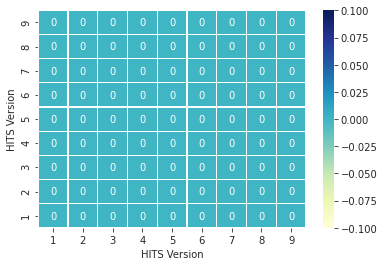

In [280]:
# plt.imshow(atau, cmap='hot')
# plt.imshow(atau, cmap='hot', interpolation='nearest')
# ax = sns.heatmap(htau, linewidth=0.1, annot=True)
# ax = sns.heatmap(htau, linewidth=0.1, annot=True,cmap='YlGnBu')
ax = sns.heatmap(apval, linewidth=0.1, annot=True,cmap='YlGnBu',xticklabels=range(1,10),yticklabels=range(1,10))
# ax = sns.heatmap(htau[2:,2:], linewidth=0.1, annot=True,cmap='YlGnBu',xticklabels=range(3,10),yticklabels=range(3,10))
ax.invert_yaxis()
# ax = sns.heatmap(htau[2:,2:], linewidth=0.5, annot=True)
plt.xlabel('HITS Version')
plt.ylabel('HITS Version')
plt.show()